In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Get Data

In [35]:
df = pd.read_csv("embeddings.csv")

df = df[df["label"].isin([0,1,2,3,4])]
df_features = df.drop(columns=["label"])

## Train Test Split

In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(df_features, df["label"], test_size=0.2, stratify= df["label"], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

## KNN

In [46]:
neighbors = [n for n in range(1, 23,2)]

acc = []
for n in neighbors:
    pipe = Pipeline([
        ('pca', PCA(n_components=3)),
        ('knn', KNeighborsClassifier(n_neighbors=n))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))



Text(0, 0.5, 'Accuracy')

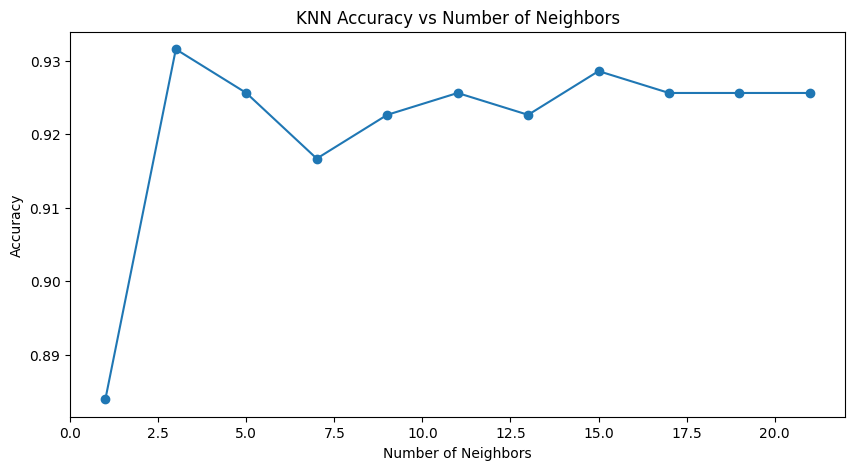

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(neighbors, acc, marker='o')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

In [39]:
pipe = Pipeline([
    ('pca', PCA(n_components=3)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])
pipe.fit(X_train_val, y_train_val)
y_pred = pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9021


## SVM

In [40]:
from sklearn.svm import SVC
kernels = ["linear", "poly", "rbf", "sigmoid"]

acc = []

for kernel in kernels:
    pipe = Pipeline([
        ('pca', PCA(n_components=3)),
        ('svm', SVC(kernel=kernel, random_state=42))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    


Text(0, 0.5, 'Accuracy')

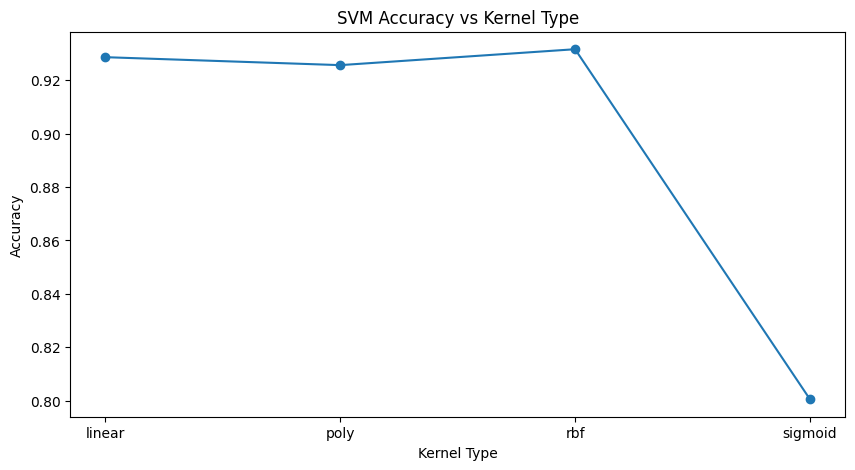

In [41]:

plt.figure(figsize=(10, 5))
plt.plot(kernels, acc, marker='o')
plt.title('SVM Accuracy vs Kernel Type')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')


    

In [42]:
pipe = Pipeline([
    ('pca', PCA(n_components=3)),
    ('svm', SVC(kernel="rbf", random_state=42))
])
pipe.fit(X_train_val, y_train_val)
y_pred = pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with SVM: {test_acc:.4f}")


Test Accuracy with SVM: 0.9288
